K-Means Silhouette Score: 0.23507051305673646
DBSCAN Silhouette Score: -0.45267051975244454


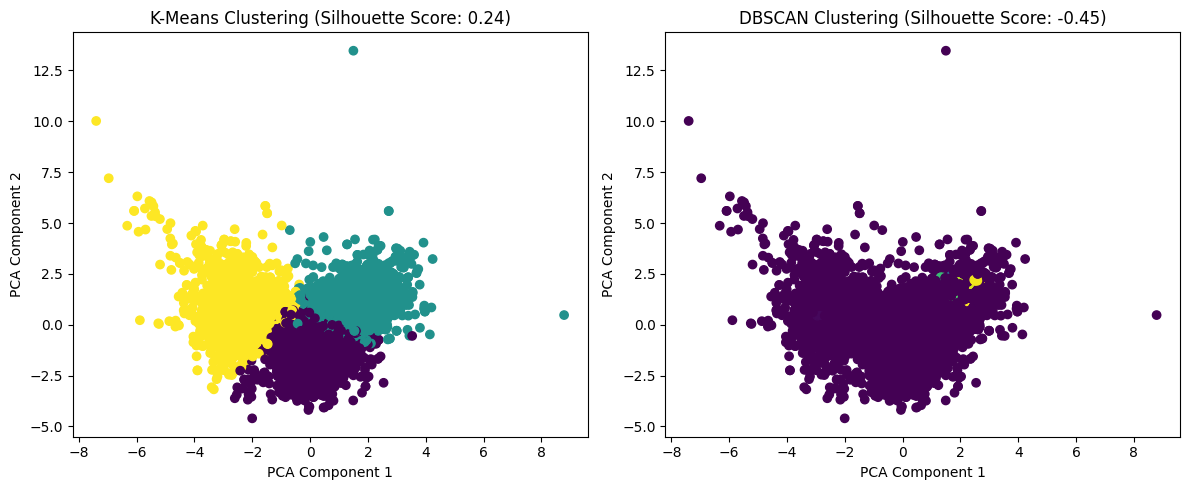


Comparison of Clustering Algorithms:
K-Means Silhouette Score: 0.23507051305673646
DBSCAN Silhouette Score: -0.45267051975244454
K-Means performed better based on the Silhouette Score.


In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load datasets
wine_red = pd.read_csv('winequality-red.csv', delimiter=';')
wine_white = pd.read_csv('winequality-white.csv', delimiter=';')

# Combine datasets (optional, depending on your analysis)
wine_combined = pd.concat([wine_red, wine_white], ignore_index=True)

# Select features for clustering (excluding the target variable 'quality')
X = wine_combined.drop(columns=['quality'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Sessa Empirical Estimator using K-Means
def sessa_kmeans(X, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    return clusters, silhouette_avg

# Sessa Empirical Estimator using DBSCAN
def sessa_dbscan(X, eps=0.5, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)
    if len(np.unique(clusters)) > 1:  # Silhouette score requires at least 2 clusters
        silhouette_avg = silhouette_score(X, clusters)
    else:
        silhouette_avg = -1  # Invalid score if only one cluster
    return clusters, silhouette_avg

# Perform clustering with K-Means
kmeans_clusters, kmeans_score = sessa_kmeans(X_scaled, n_clusters=3)
print(f"K-Means Silhouette Score: {kmeans_score}")

# Perform clustering with DBSCAN
dbscan_clusters, dbscan_score = sessa_dbscan(X_scaled, eps=0.5, min_samples=5)
print(f"DBSCAN Silhouette Score: {dbscan_score}")

# Visualize the clusters (2D example using PCA for visualization)
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot K-Means clusters
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, cmap='viridis', marker='o')
plt.title(f'K-Means Clustering (Silhouette Score: {kmeans_score:.2f})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Plot DBSCAN clusters
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_clusters, cmap='viridis', marker='o')
plt.title(f'DBSCAN Clustering (Silhouette Score: {dbscan_score:.2f})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

# Compare results
print("\nComparison of Clustering Algorithms:")
print(f"K-Means Silhouette Score: {kmeans_score}")
print(f"DBSCAN Silhouette Score: {dbscan_score}")

if kmeans_score > dbscan_score:
    print("K-Means performed better based on the Silhouette Score.")
else:
    print("DBSCAN performed better based on the Silhouette Score.")